# Exploring and Cleaning the Dataset

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
%matplotlib inline
import matplotlib.colors
import warnings
warnings.filterwarnings("ignore")
import os
import datetime as dt
plt.rcParams['figure.dpi'] = 140

In [2]:
# Initial look at dataset to see what to clean

df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Checking percentage of null values, remove rows where column's total null vales are <1%

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [4]:
# Replacing country null values with mode, NA for cast and director null values

df['country'] = df['country'].fillna(df['country'].mode()[0])

df['cast'].replace(np.nan, 'NA',inplace  = True)
df['director'].replace(np.nan, 'NA',inplace  = True)

df.dropna(inplace=True)

df.drop_duplicates(inplace= True)

In [5]:
# Checking if there are any null values left

df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [6]:
# Changing date format to YYYY/MM/DD and adding month names

df["date_added"] = pd.to_datetime(df['date_added'])
df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021


In [7]:
#Feature Engineering

# Keeping the first country when multiple are listed

df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['count'] = 1

# Simplyfying age ratings

ratings_ages = {
    'G': 'Kids',
    'TV-G': 'Kids',
    'TV-Y': 'Kids',
    'TV-PG': 'Older Kids',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'PG': 'Older Kids',
    'PG-13': 'Teens',
    'TV-14': 'Teens',
    'TV-MA': 'Adults',
    'R': 'Adults',
    'NR': 'Adults',
    'UR': 'Adults',
    'NC-17': 'Adults'}

df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

# Cleaning genres so there are no whitespaces

df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

# Reducing name length

df['country'].replace('United States', 'USA', inplace=True)
df['country'].replace('United Kingdom', 'UK',inplace=True)
df['country'].replace('South Korea', 'S. Korea',inplace=True)

df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

In [8]:
# Displaying dataset after cleaning

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,first_country,count,target_ages,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,USA,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021,USA,1,Teens,[Documentaries]
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,South Africa,1,Adults,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",USA,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021,USA,1,Adults,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,NA,NA,USA,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021,USA,1,Adults,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021,India,1,Adults,"[International TV Shows, Romantic TV Shows, TV..."


# Analysing the Dataset

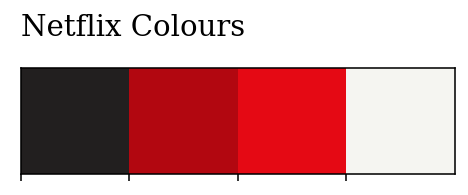

In [9]:
# Palette based on Netflix colours

sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("Netflix Colours",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

In [10]:
# Ratio of Movies & TV shows available on Netflix

x=df.groupby(['type'])['type'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

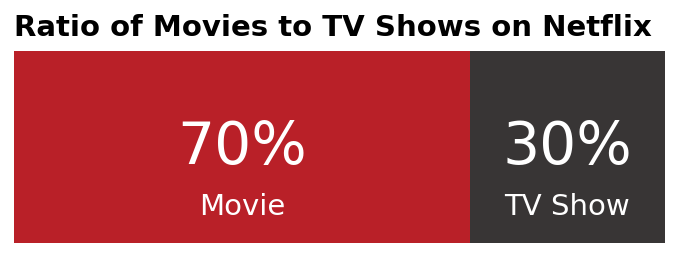

In [11]:
## Stacked bar graph showing the ratio of Movies to TV Shows on Netflix

# Forming bar plot

fig, ax = plt.subplots(1,1,figsize=(6,2))

ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#221f1f', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# Movies percentage

for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center', fontsize=30, color='white')

    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center', fontsize=15, color='white')

# TV Shows percentage

for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center', fontsize=30, color='white')
    ax.annotate("TV Show", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center', fontsize=15, color='white')

# Title

fig.text(0.125,0.9,'Ratio of Movies to TV Shows on Netflix', fontsize=15, fontweight='bold')  

# Removing border from plot

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Removing legend

ax.legend().set_visible(False)

plt.show()

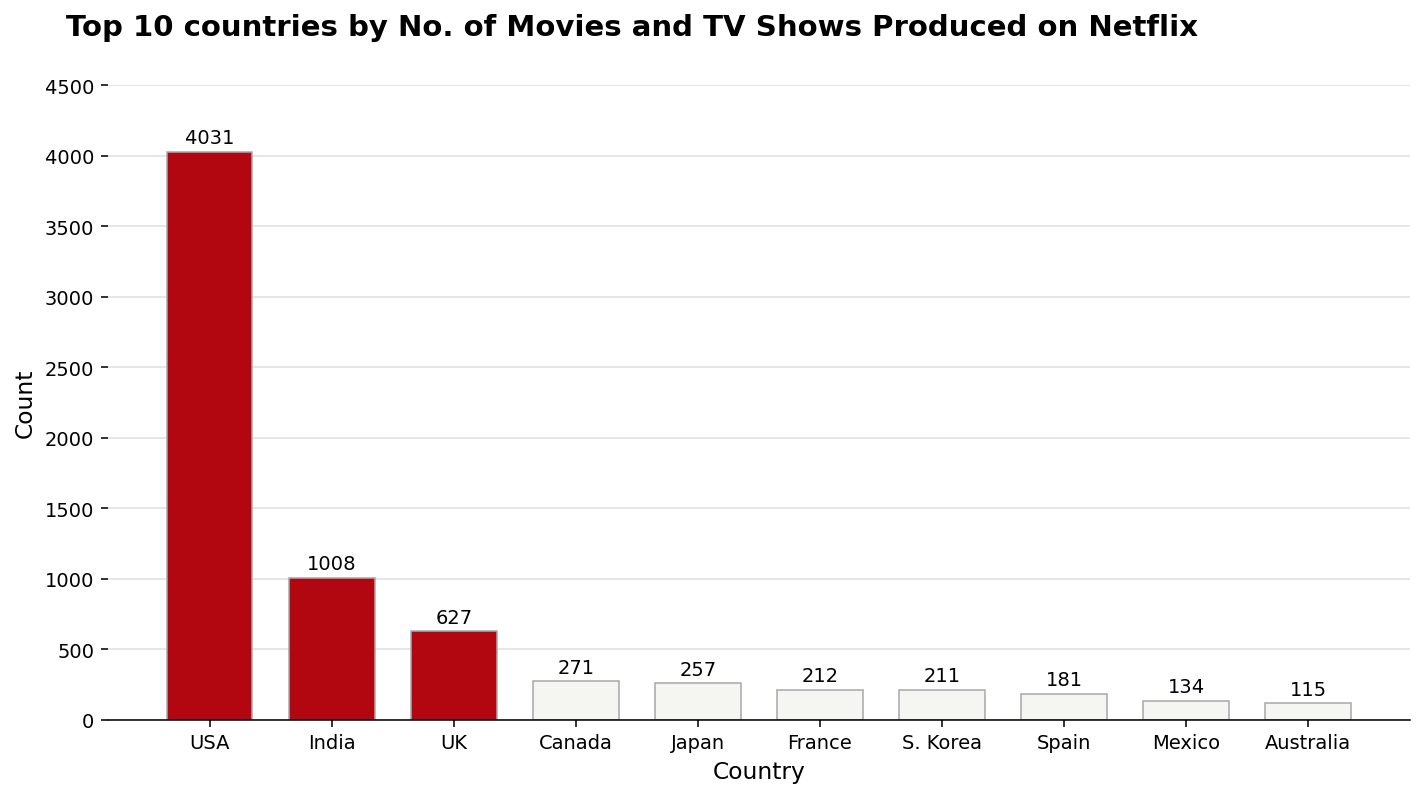

In [12]:
## Bar graph showing top 10 countries by volume of content

data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

# Shading top 3 countries in a bolder colour 

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710'

# Forming bar graph

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.7, 
       edgecolor='darkgray',
       linewidth=0.8,color=color_map)

# Displaying actual count of movies on top of each bar

for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 100),
                   va = 'center', ha='center')

# Removing border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Sorting y-axis

grid_y_ticks = np.arange(0, 5000, 500)
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='-', alpha=0.4)

# Titles and Axis labels

fig.text(0.1, 0.94, 'Top 10 countries by No. of Movies and TV Shows Produced on Netflix', fontsize=15, fontweight='bold')
plt.xlabel("Country", fontsize=12,loc='center',y=-1.5)
plt.ylabel("Count", fontsize=12,)

plt.show()

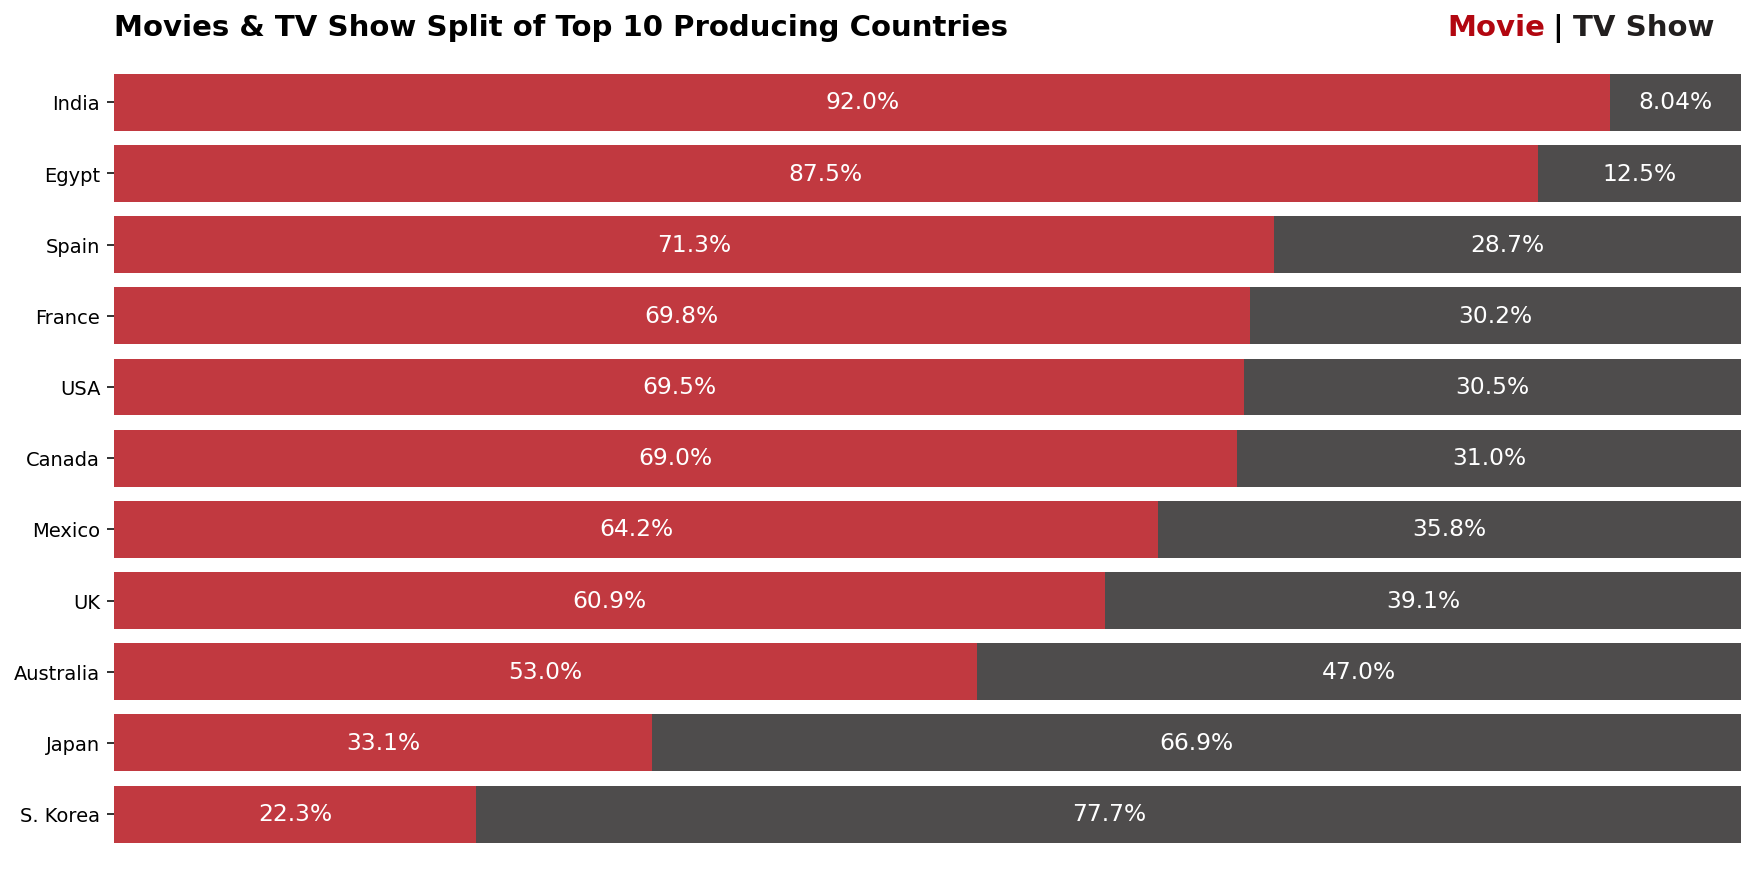

In [13]:
## Stacked bar graph showing the split of Movies and TV Shows produced by these top 10 countries

# Finding the split of Movies and TV Shows

country_order = df['first_country'].value_counts()[:11].index
data_q2q3 = df[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Forming bar graph

fig, ax = plt.subplots(1,1,figsize=(15, 8))

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')

# Adding percentage values for Movie and TV Show distribution

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, color='white')

# Removing border from plot

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
ax.set_xlim(0, 1)
ax.set_xticks([])

# Creating title and legend

fig.text(0.125, 0.88, 'Movies & TV Show Split of Top 10 Producing Countries', fontweight="bold", fontsize=15)
fig.text(0.76,0.88,"Movie", fontweight="bold", fontsize=15, color='#b20710')
fig.text(0.81,0.88,"|", fontweight="bold", fontsize=15, color='black')
fig.text(0.82,0.88,"TV Show", fontweight="bold", fontsize=15, color='#221f1f')

plt.show()

In [14]:
# Finding how many Movies and TV Shows there are per age rating 

order = pd.DataFrame(df.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['rating'])

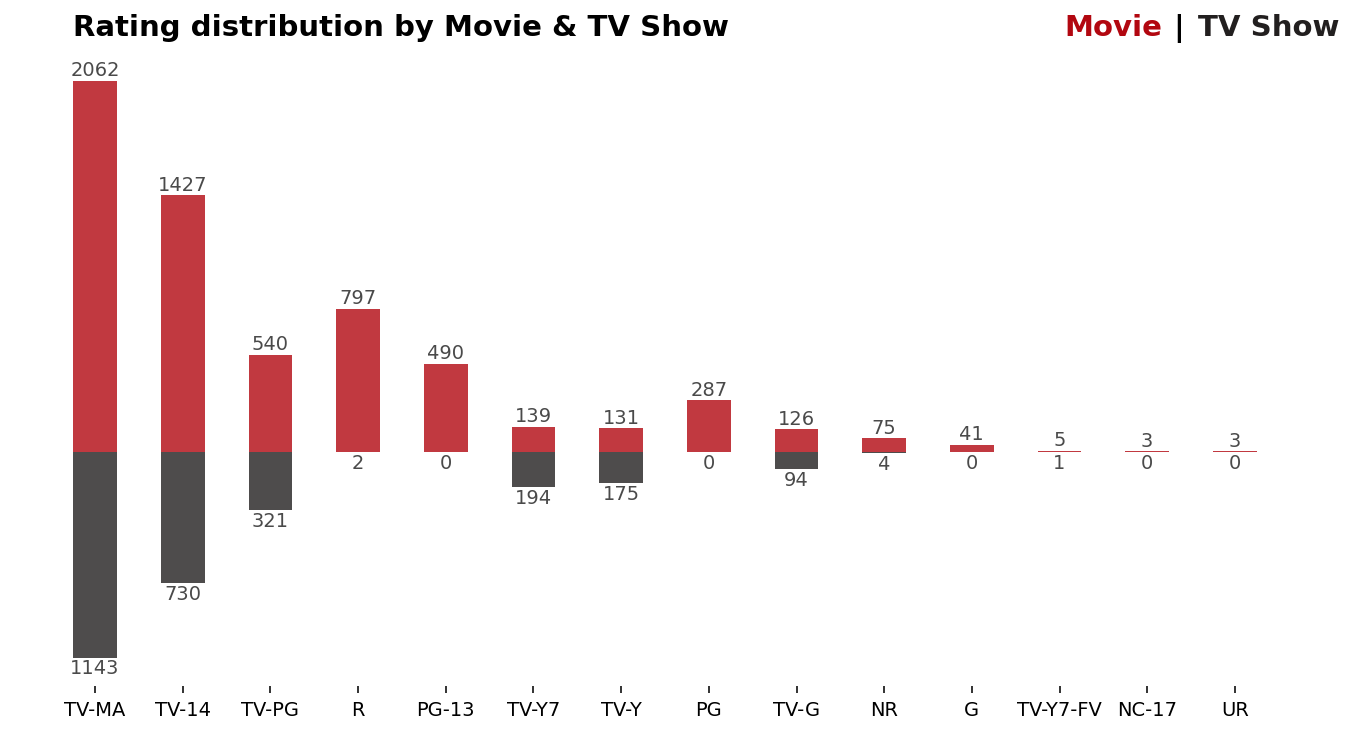

In [15]:
## Creating an up/down bar graph showing rating distribution for Movies and TV Shows

# Seperating rating counts for Movies and TV Shows

mf = df.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

# Forming bar graph

movie = mf.loc['Movie']
tv = - mf.loc['TV Show']

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color='#b20710', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#221f1f', alpha=0.8, label='TV Show')

# Displaying actual count of Movies/TV Shows for each bar

for i in tv.index:
    ax.annotate(f"{-tv[i]}", xy=(i, tv[i] - 60),
                   va = 'center', ha='center', color='#4a4a4a')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", xy=(i, movie[i] + 60),
                   va = 'center', ha='center', color='#4a4a4a')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Removing axis and default legend from plot

ax.set_yticks([])    
ax.legend().set_visible(False)

# Creating title and legend

fig.text(0.16, 0.9, 'Rating distribution by Movie & TV Show', fontsize=15, fontweight='bold')
fig.text(0.75,0.9,"Movie", fontweight="bold", fontsize=15, color='#b20710')
fig.text(0.815,0.9,"|", fontweight="bold", fontsize=15, color='black')
fig.text(0.83,0.9,"TV Show", fontweight="bold", fontsize=15, color='#221f1f')

plt.show()

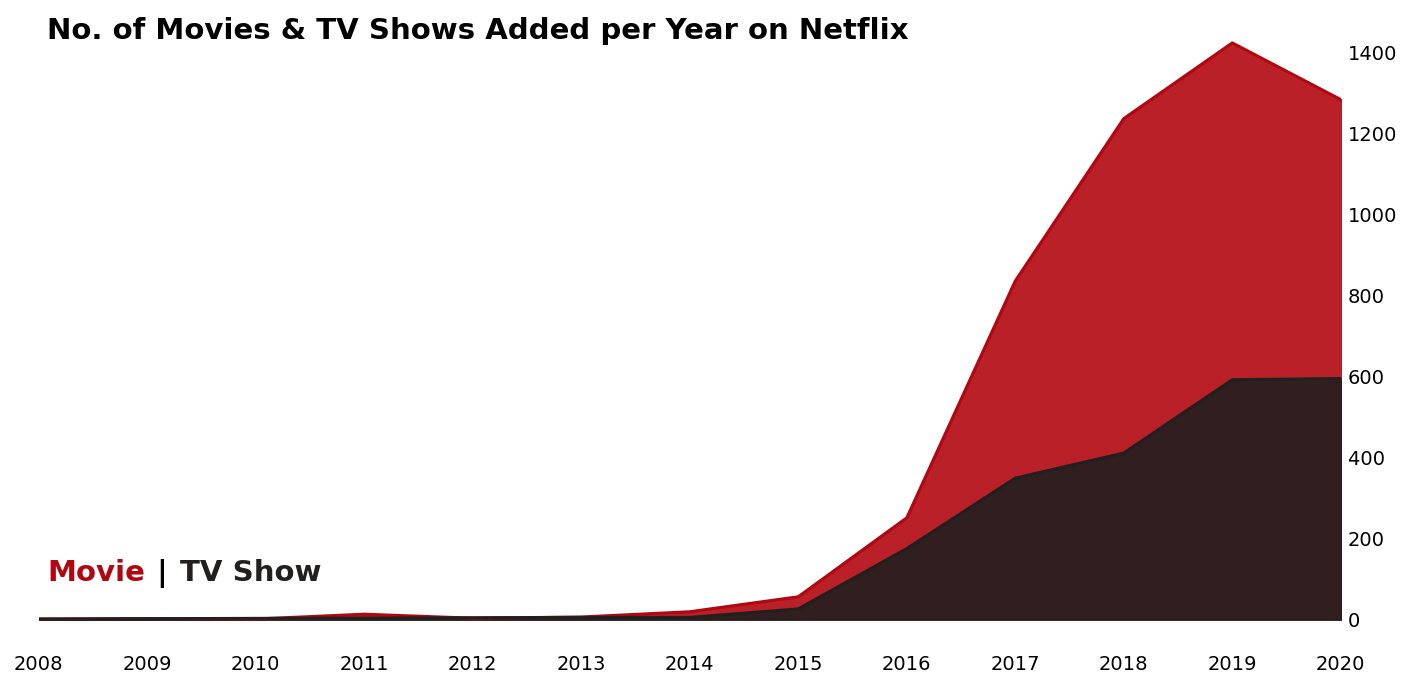

In [16]:
## Forming a line graph to display the addition of content on Netflix per year

# Line graph

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

# Calculating how many Movies and TV Shows were added each year

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = df[df['type']==mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)
    
# Removing border from plot and moving y-axis to right side

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.yaxis.tick_right()

# Altering x-axis to show individual years from 2008-2020 

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))
ax.tick_params(axis=u'both', which=u'both',length=0)

# Creating title and legend

fig.text(0.13, 0.85, 'No. of Movies & TV Shows Added per Year on Netflix', fontsize=15, fontweight='bold')
fig.text(0.13,0.205,"Movie", fontweight="bold", fontsize=15, color='#b20710')
fig.text(0.195,0.205,"|", fontweight="bold", fontsize=15, color='black')
fig.text(0.209,0.205,"TV Show", fontweight="bold", fontsize=15, color='#221f1f')

plt.show()

In [17]:
## Generating heatmap to show correlation between different genres

# Creating a custom colour map with Netflix colours

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])

# Forming heatmap

def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation',fontweight='bold',fontsize=15)
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, vmin=-.5, center=0, square=True, linewidths=2.5)
    plt.show()
    
# Changing dataframe column names for use in heatmap
    
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]

There are 20 types in the Netflix Movie Dataset


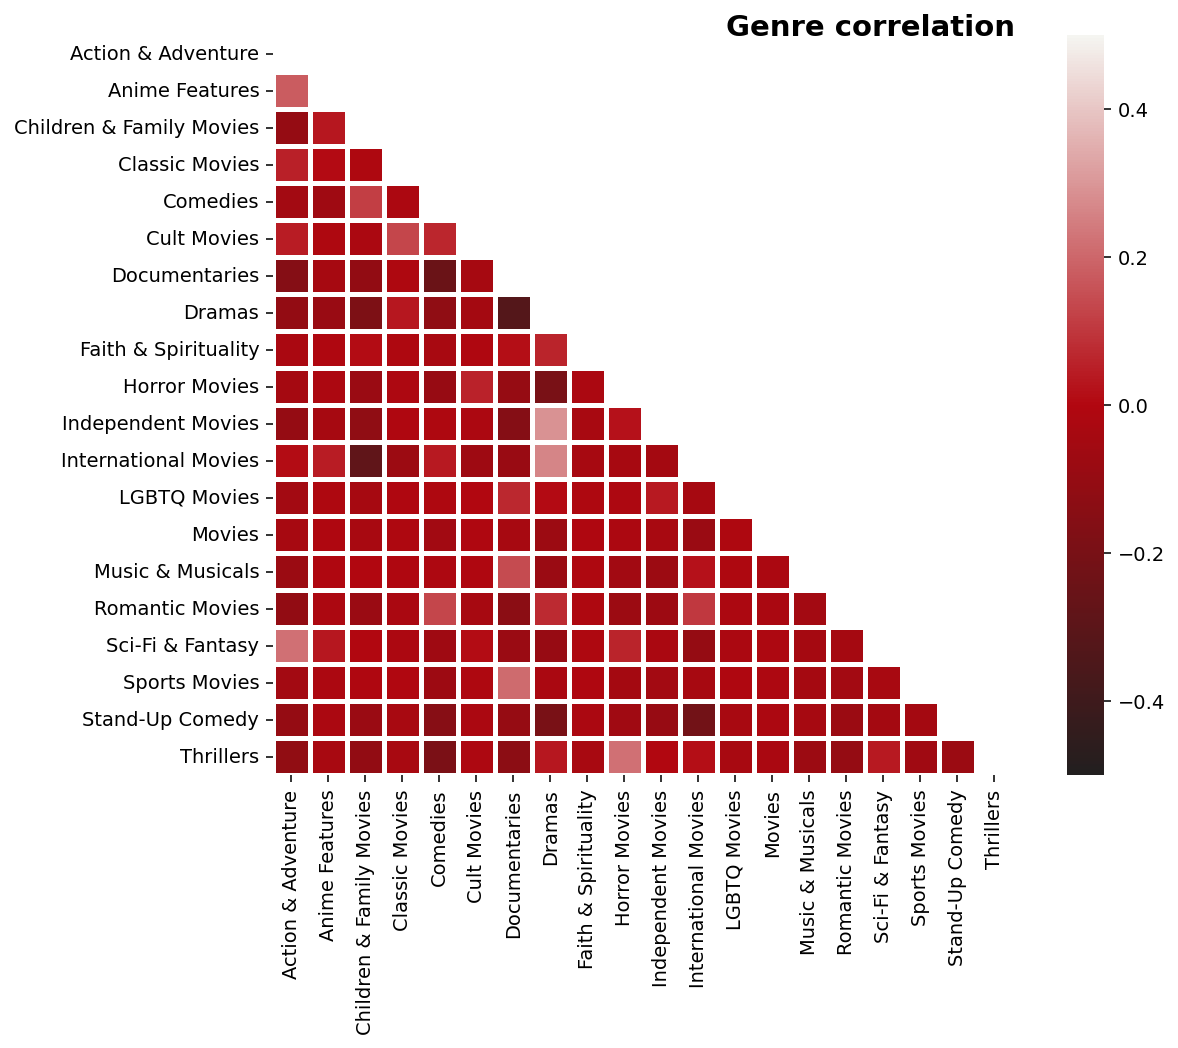

In [18]:
# Displaying heatmap for Movie genre correlation

genre_heatmap(df_movies, 'Movie')
plt.show()

There are 22 types in the Netflix TV Show Dataset


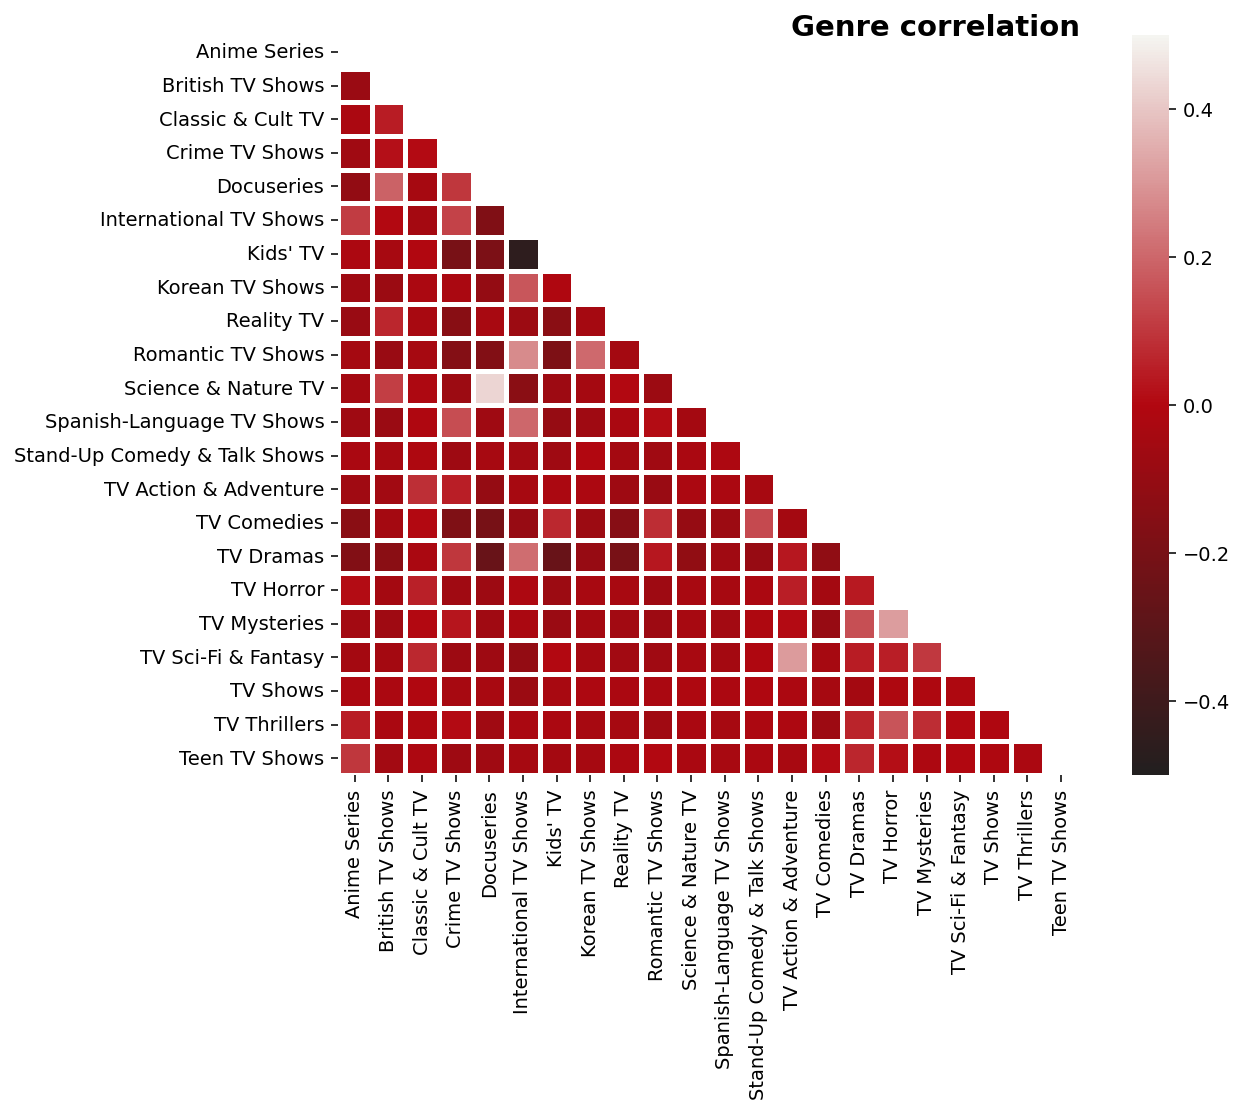

In [19]:
# Displaying heatmap for TV Show genre correlation

genre_heatmap(df_tv, 'TV Show')
plt.show()

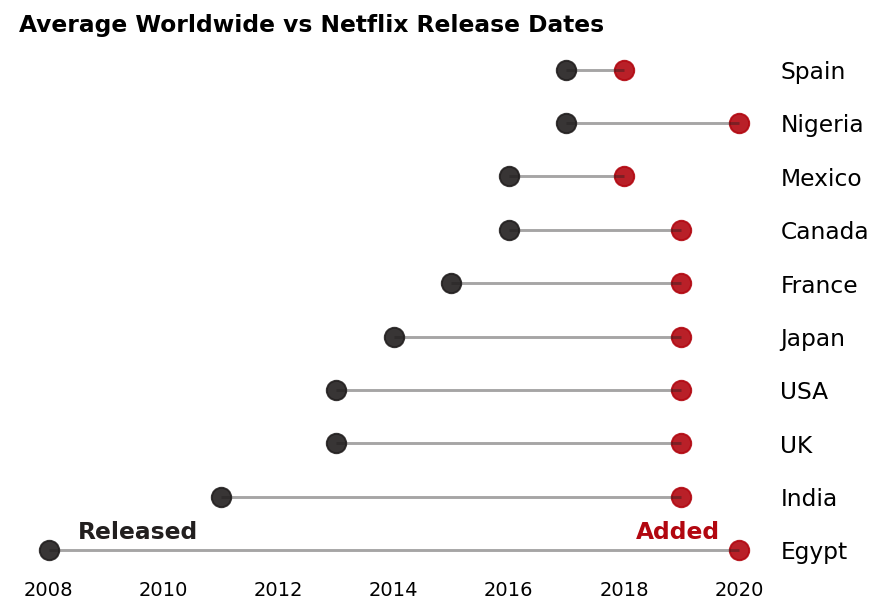

In [20]:
# Finding the average worldwide release date of a movie and subsequent Netflix release date for each country's productions

data = df_movies.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']
df_loli = df_movies.loc[df_movies['first_country'].isin(data)]
loli = df_loli.groupby('first_country')['release_year','year_added'].mean().round()

# Reorder data so oldest release dates are at the bottom of the plot

ordered_df = loli.sort_values(by='release_year')
ordered_df_rev = loli.sort_values(by='release_year',ascending=False)
my_range=range(1,len(loli.index)+1)

# Creating dumdbell plot

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
fig.text(0.13, 0.9, 'Average Worldwide vs Netflix Release Dates', fontsize=12, fontweight='bold')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='#221f1f', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#221f1f',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#b20710',s=100, alpha=0.9 , label='Average added date')

# Removing border and y-axis tick marks from plot

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)

# Moving y-axis to right side

ax.yaxis.tick_right()
plt.yticks(my_range, ordered_df.index, fontsize=12)

# Creating a legend

fig.text(0.19,0.175,"Released", fontweight="bold", fontsize=12, color='#221f1f')
fig.text(0.76,0.175,"Added", fontweight="bold", fontsize=12, color='#b20710')

plt.show()